# Descripción proyecto

El presente trabajo analiza los datos de Zuber, una nueva empresa de viajes compartidos que está iniciando operaciones en Chicago. El objetivo es comprender las preferencias de los pasajeros y evaluar el impacto de factores externos en los viajes.

# Inicialización
En la primera parte de este trabajo se realizarán los siguientes procesos: 
1. Cargar librerías para realizar el análisis.
2. Importar dataset. 
3. Revisar datos para posterior limpieza y enrequecimiento en caso de ser necesario. 


## Descripción de los datos 

In [1]:
#importar librerías
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#cargar primer dataset 
company_trips_df = pd.read_csv('/datasets/project_sql_result_01.csv')
company_trips_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
company_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company_trips_df.duplicated().sum()

0

In [5]:
company_trips_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
#cargar segundo dataset 
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
trips_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
#cargar tercer dataset
loop_airport_trip_df = pd.read_csv('/datasets/project_sql_result_07.csv')

In [10]:
loop_airport_trip_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
loop_airport_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
loop_airport_trip_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Conclusiones
Para iniciar con el análisis exploratorio de datos se importaron las libreías necesarias y cargaron los datos. Este análisis se va a realizar utilizando dos datasets: company_trips_df y trips_df. Al revisar los datos, podemos dar cuenta que company_trips_df tiene 2 columnas, 64 filas y no posee valores nules.Por otro lado, trips_df tiene dos columnas y 94 filas, sin valores nulos tampoco. En el caso de weather_df, este dataframe tiene 2 columnas y 1068 filas y 0 NULL 
Además, en las 3 tablas se aplican los métodos info y describe. Los tipos de datos en cada columna corresponde a la información en cada fila. 

## Preprocesamiento de datos 

In [13]:
#cambiar tipo de dato en DataFrame 'trips_df'
trips_df['average_trips'] = trips_df['average_trips'].astype('int')

In [14]:
#revisar cambio
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


### Conclusiones
Se modifica el tipo de dato de la coluna average_trips a entero porque los decimales no aportan información y así se presenta todo de manera más limpia.

## Análisis de datos

In [15]:
#top10 compañías 
top10_companies = (company_trips_df.sort_values(by='trips_amount', ascending=False)
                                   .head(10))
top10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


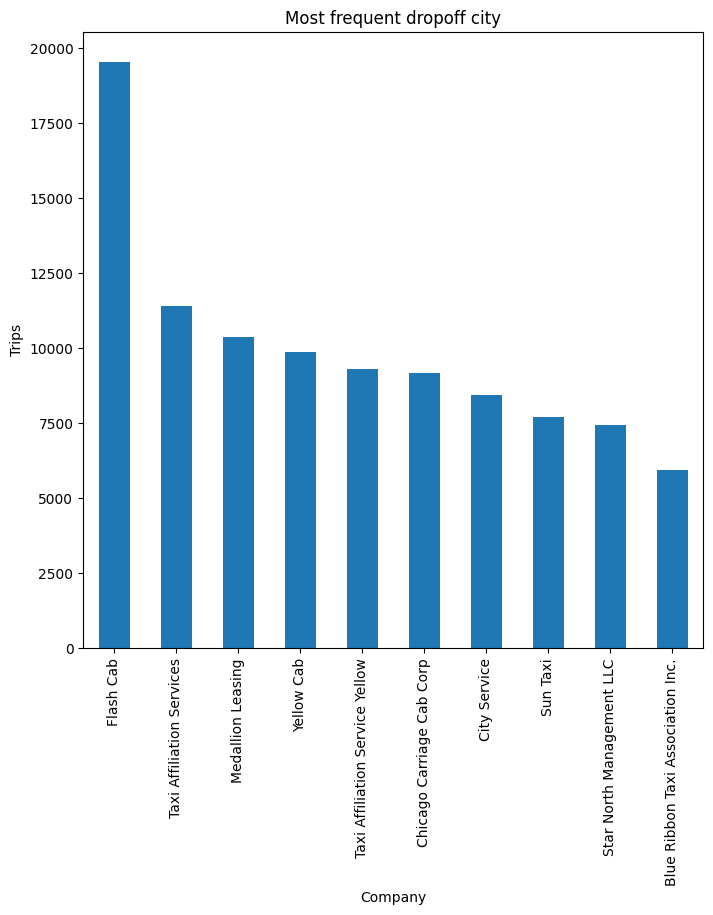

In [16]:
#graficar top10_companies
top10_companies.plot(kind='bar',
                     title='Most frequent dropoff city',
                     x= 'company_name',
                     xlabel='Company',
                     ylabel='Trips',
                     figsize=[8, 8])    

plt.legend().remove()
plt.show()

In [17]:
#top 10 ciudades donde finalizan los datos
top10_dropoff = (trips_df.sort_values(by='average_trips', ascending=False)
                        .head(10))
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


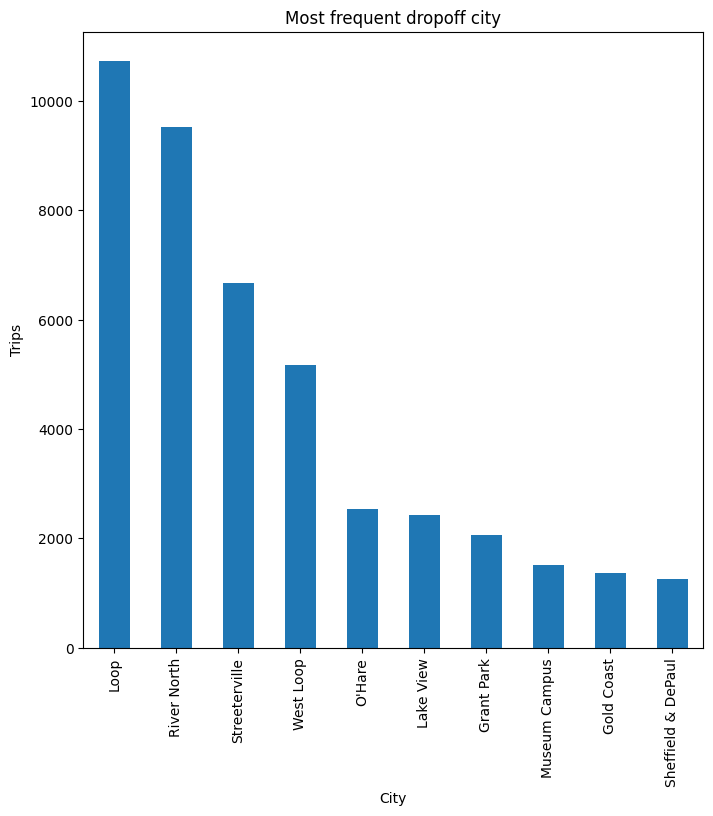

In [18]:
#graficar top10_dropoff
top10_dropoff.plot(kind='bar',
                   title='Most frequent dropoff city',
                   x= 'dropoff_location_name',
                   xlabel='City',
                   ylabel='Trips',
                   figsize=[8, 8])

plt.legend().remove()
plt.show()

### Conclusiones 
Al revisar las compañías más frecuentes, nos damos cuenta que Flash Cab tiene casi el doble de viajes que la segunda compañía más utilizada. Esto puede deberse a mejores tarifas o mayor cantidad de convenios lo que al final se traduce en un precio más económico por viaje en realación a otras empresas. 

Si nos fijamos en los destinos más populares, Loop y River North son los destinos más recurrentes seguido por Streeterville. La razón de estos destinos puede deberse a que Loop es el distrito de negocios de Chicago por lo que se puede inferir que varios recorridos son hechos por personas que trabajan en esa zona. En el caso de Streeterville y especialmente River North, estos son destinos turísticos por lo que los visitantes son los que probablemente viajan con mayor frecuencia a esas zonas. 

## Prueba de hipótesis

Probar hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos:

a) Hipótesis nula: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

b) Hipótesis alternativa: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. 

### Revisión de datos

In [19]:
#almacenar datos para buen clima
good_weather = loop_airport_trip_df.query('weather_conditions == "Good"')

In [20]:
#revisar datos 'Good'
good_weather.describe()

,duration_seconds
count,888.000000
mean,1999.675676
std,759.198268
min,0.000000
25%,1389.750000
50%,1800.000000
75%,2460.000000
max,7440.000000


<function matplotlib.pyplot.show(close=None, block=None)>

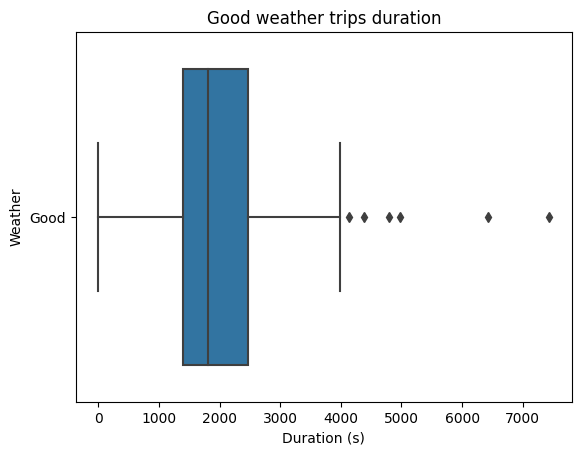

In [21]:
#revisar outliers
sns.boxplot(x='duration_seconds', y='weather_conditions', data = good_weather)

plt.title('Good weather trips duration')
plt.xlabel('Duration (s)')
plt.ylabel('Weather')
plt.show

In [22]:
#almacenar datos para mal clima 
bad_weather = loop_airport_trip_df.query('weather_conditions == "Bad"')

In [23]:
#revisar datos 'Bad'
bad_weather.describe()

,duration_seconds
count,180.000000
mean,2427.205556
std,721.314138
min,480.000000
25%,1962.000000
50%,2540.000000
75%,2928.000000
max,4980.000000


<function matplotlib.pyplot.show(close=None, block=None)>

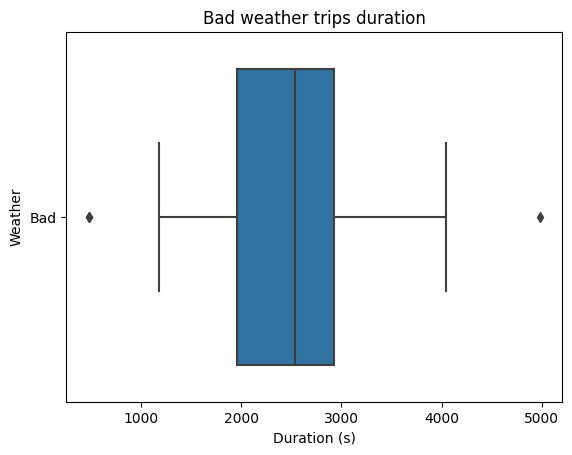

In [24]:
#revisar outliers
sns.boxplot(x='duration_seconds', y='weather_conditions', data=bad_weather)

plt.title('Bad weather trips duration')
plt.xlabel('Duration (s)')
plt.ylabel('Weather')
plt.show

### Eliminar outliers

In [25]:
#calcular outliers good_weather

good_q1 = good_weather['duration_seconds'].quantile(0.25)
good_q3 = good_weather['duration_seconds'].quantile(0.75)
good_iqr = good_q3 - good_q1

good_weather_outliers = good_q3 + 1.5*good_iqr
good_weather_outliers

4065.375

In [26]:
#calcular outliers bad_weather

bad_q1 = bad_weather['duration_seconds'].quantile(0.25)
bad_q3 = bad_weather['duration_seconds'].quantile(0.75)
bad_iqr = bad_q3 - bad_q1

bad_weather_outliers = bad_q3 + 1.5*bad_iqr
bad_weather_outliers

4377.0

In [27]:
#calcular variables sin outliers

#good_weather
good_weather_no_outliers = good_weather.query("duration_seconds < @good_weather_outliers")['duration_seconds']
                           
#bad_weather
bad_weather_no_outliers = bad_weather.query("duration_seconds < @bad_weather_outliers")['duration_seconds']

### Varianzas


In [28]:
#comparar si las varianzas de las variables son iguales
alpha= 0.05

results = st.levene(good_weather_no_outliers, bad_weather_no_outliers)

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula. Varianzas diferentes')
else:
    print('No podemos descartar la hipótesis nula')

p_value: 0.6573128431498012
No podemos descartar la hipótesis nula


### Testeo hipótesis

In [29]:
alpha= 0.05

results = st.ttest_ind(good_weather_no_outliers, bad_weather_no_outliers, equal_var=False)

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula. El promedio de duración de los viajes Loop-Aeropuerto, cambia dependiendo del clima')
else:
    print('No podemos descartar la hipótesis nula')

p_value: 4.935453982841293e-13
Podemos descartar la hipótesis nula. El promedio de duración de los viajes Loop-Aeropuerto, cambia dependiendo del clima


### Hipótesis derivada

Probar hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es mayor los sábados lluviosos:

a) Hipótesis nula: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

b) Hipótesis alternativa: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es mayor los sábados lluviosos.


In [30]:
alpha= 0.05

results = st.ttest_ind(bad_weather_no_outliers, good_weather_no_outliers, equal_var=False, alternative='greater')

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula. El promedio de duración de los viajes Loop-Aeropuerto es mayor en un sábado lluvioso.')
else:
    print('No podemos descartar la hipótesis nula. El promedio de duración de los viajes Loop-Aeropuerto, no cambia dependiendo del clima.')

p_value: 2.4677269914206463e-13
Podemos descartar la hipótesis nula. El promedio de duración de los viajes Loop-Aeropuerto es mayor en un sábado lluvioso.


### Conclusiones

Para iniciar el análisis de hipótesis estadísticas, se revisaron los datos de todas las variables utilizando el método describe() y se identificaron valores atípicos mediante diagramas de caja. Dado que la cantidad de outliers era baja en comparación con el total de datos, se optó por eliminarlos para evitar sesgar los resultados en las pruebas de hipótesis. Para el testeo de hipótesis, se eligió la prueba t-test, ya que se estaba comparando promedios, y se estableció un nivel de significancia (𝛼) de 0.05, un valor estándar en este tipo de análisis. Además, antes de realizar la prueba, se verificó la igualdad de las varianzas.

En primer lugar, se evaluó si las condiciones climáticas influían en el promedio del tiempo de viaje los sábados, lo que resultó en el rechazo de la hipótesis nula. Posteriormente, se diseñó una nueva prueba para comprobar si el promedio de los viajes en sábados lluviosos era mayor, lo cual confirmó la hipótesis planteada.

## Conclusión general 
Para comenzar el análisis de datos, se cargaron las librerías necesarias y luego se importaron los DataFrames: company_trips_df, trips_df y loop_airport_df. Se revisaron las columnas y filas de cada tabla, comprobando que no contenían datos nulos. El análisis inicial se realizó utilizando los métodos info(), head() y describe(). Posteriormente, se decidió convertir los datos de la columna average_trips de la tabla trips_df de tipo float a int para simplificar su manejo.

A continuación, se identificaron las compañías y destinos más populares, resultando en Flash Cab como la compañía más frecuente y Loop y River North como los destinos principales.

Para concluir el análisis, se puso a prueba la hipótesis de que la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare varía en los sábados lluviosos. Se utilizó una prueba t-test con un nivel de significancia de 0.05. Los resultados iniciales llevaron al rechazo de la hipótesis nula, lo que dio lugar a una hipótesis secundaria: la duración promedio de los viajes desde Loop hasta O'Hare es mayor los sábados lluviosos. Esta nueva hipótesis fue aceptada tras la prueba estadística.